# Linear Regression Model 
### 1 independent variable[years of experience] & 1 dependent variable[salary]

In [85]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('data/Salary_Data.csv')

In [23]:
type(df)

pandas.core.frame.DataFrame

In [24]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

### This is a "supervised machine learning algorithm"
### Target column here is salary. It is continous. this will be prediction (linear regression)

In [26]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [27]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [28]:
df['Salary'].head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [29]:
df['Salary'].unique()

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [30]:
df['Salary'].nunique()

30

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

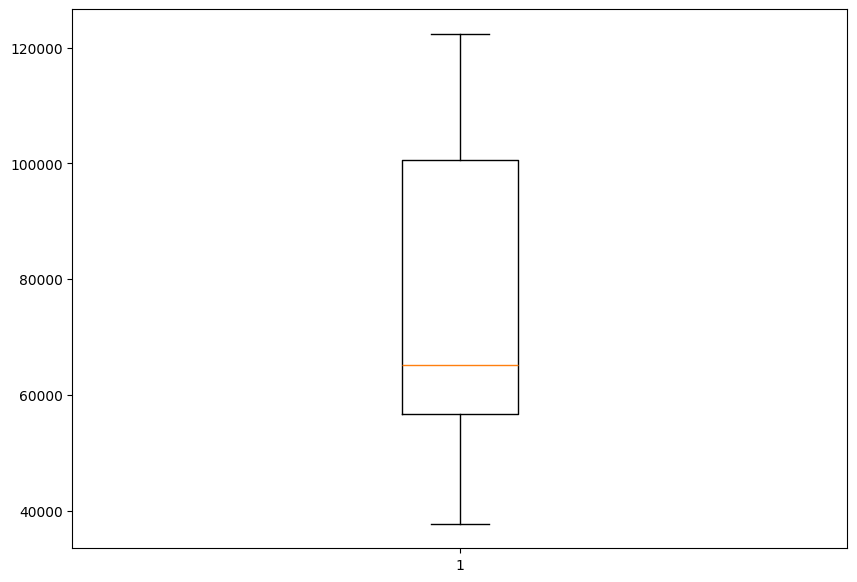

In [87]:
# box plot shows how the distibution looks like.

fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['Salary'])
plt.show()

(array([ 6., 11.,  2.,  4.,  7.]),
 array([ 37731.,  54663.,  71595.,  88527., 105459., 122391.]),
 <BarContainer object of 5 artists>)

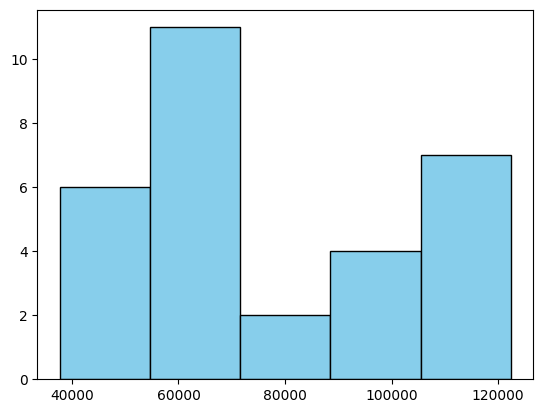

In [33]:
plt.hist(df['Salary'], bins=5, color='skyblue', edgecolor='black')

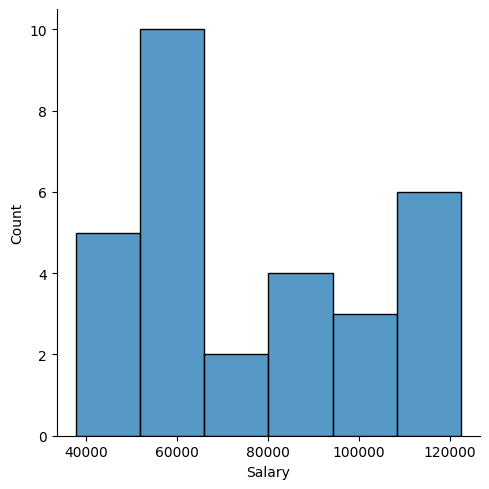

In [34]:
sns.displot(df['Salary'])
plt.show()

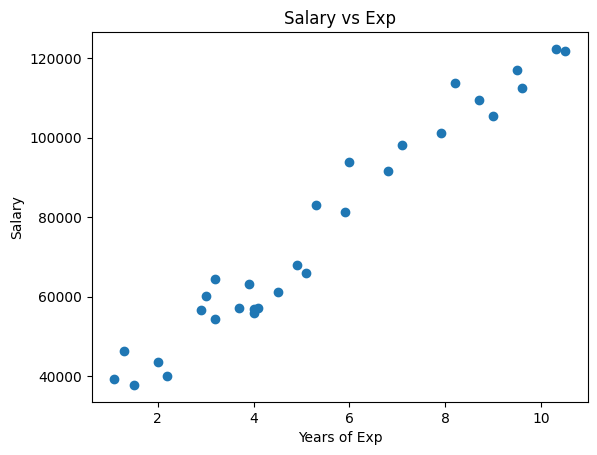

In [35]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.title('Salary vs Exp')
plt.xlabel('Years of Exp')
plt.ylabel('Salary')
plt.show()

In [36]:
corr = df.corr(method = 'pearson')

In [37]:
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [38]:
lst = [1, 2, 3, 4, 5]
print(lst[:4])
print(lst[4:])

[1, 2, 3, 4]
[5]


In [88]:
# slicing will done with ".iloc" here

# X = df['YearsExperience']
# y = df['Salary']
X = df.iloc[:,:1]
y = df.iloc[:, 1:]

In [47]:
X.shape, y.shape

((30, 1), (30, 1))

In [48]:
type(X)

pandas.core.frame.DataFrame

In [55]:
! pip install scikit-learn

     ---------------------------------------- 11.0/11.0 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 KB 2.7 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [53]:
! pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [56]:
# spliting the dataset randomly in to 80% and 20%
# 80% for "Training"
# 20% for "Validation"

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=200)

In [58]:
df.shape

(30, 2)

In [59]:
X_train.shape, X_val.shape

((24, 1), (6, 1))

In [60]:
y_train.shape, y_val.shape

((24, 1), (6, 1))

In [63]:
! pip3 install statsmodels

     ---------------------------------------- 9.8/9.8 MB 706.8 kB/s eta 0:00:00
     -------------------------------------- 233.9/233.9 KB 4.8 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### [A] statsmodel:
### Why we are using "statsmodel" means it can help you to see all those "P-value" & "F-value". So that we can see what is our "R2"

In [64]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [66]:
# Fit regression model (using the natural log of one of the regressors)
results = sm.OLS(y_train, X_train).fit()

In [67]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              847.7
Date:                Sat, 03 Aug 2024   Prob (F-statistic):                    1.18e-19
Time:                        22:56:43   Log-Likelihood:                         -260.99
No. Observations:                  24   AIC:                                      524.0
Df Residuals:                      23   BIC:                                      525.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [69]:
# Now here both the models are significant
# so we can use this "results" model for prediction purpose

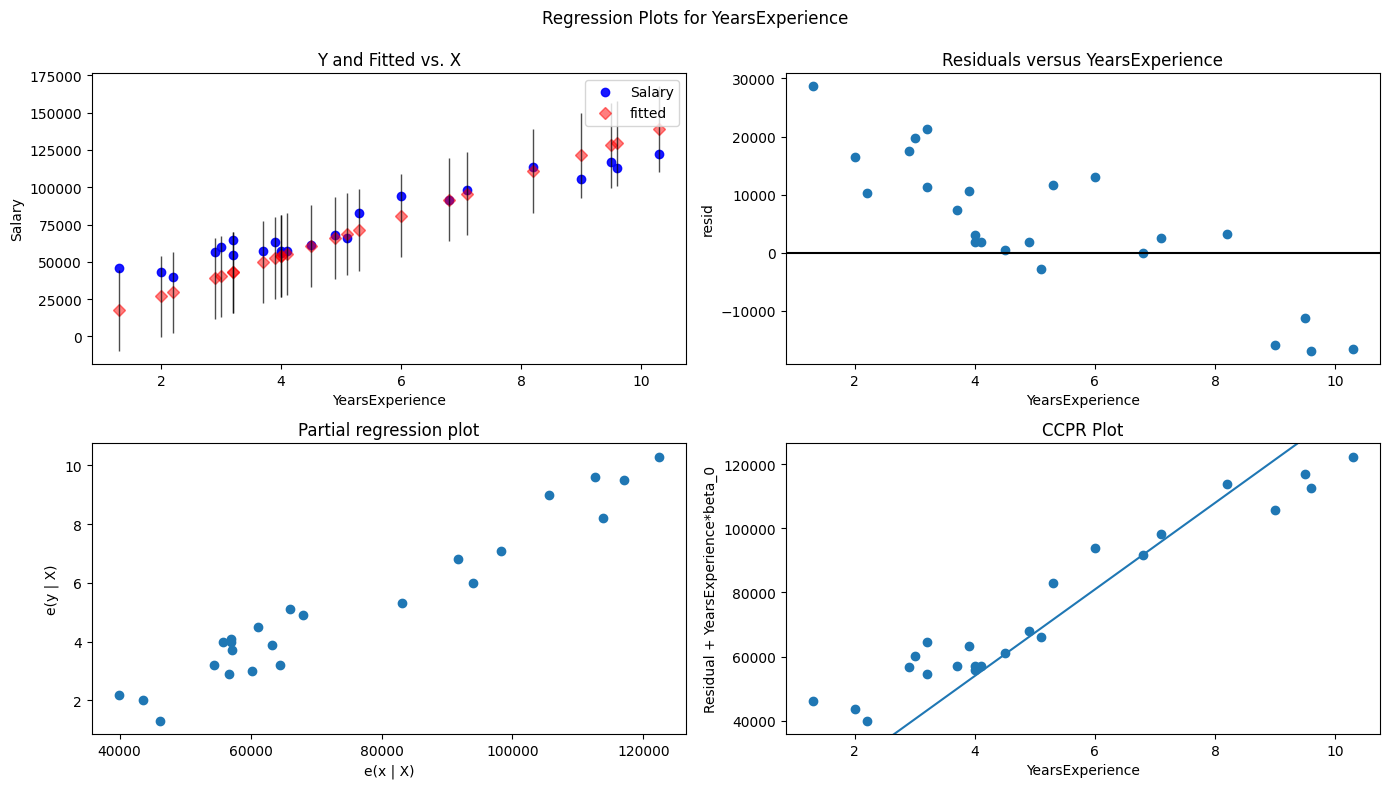

In [71]:
# now lets see whether this model will follow the 4 assumptions
# 1. there should be a linear relationship
# 2. the error is random (thers is no any pattern here). Still there are few outliers present
# 3. the CCPR plot(quartial plot) is normal here



# modify figure size 
fig = plt.figure(figsize=(14, 8)) 
  
# creating regression plots 
fig = sm.graphics.plot_regress_exog(results, 
                                    'YearsExperience', 
                                    fig=fig) 

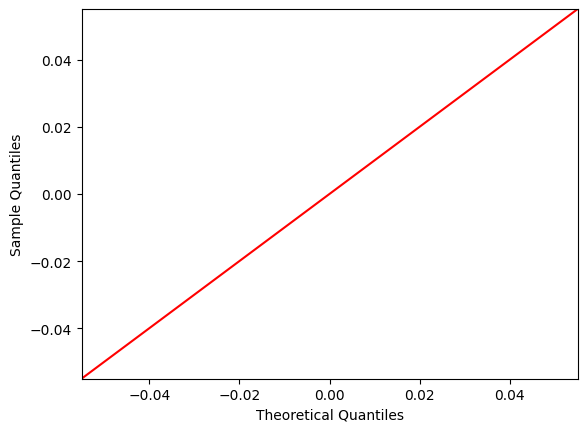

In [73]:
# 4. this was not covered in video but this is quartile-quartile plot of residuals.
# this is also normal here

import pylab as py
y_hat = results.predict(X_train)
residuals = y_hat - y_train
sm.qqplot(residuals, line ='45') 
py.show() 

### [B] sklearn model:
### we can alos use this model for linear regression
### the O/P which we get in "statsmodel" and "sklearn model" are different

In [89]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred_train = reg.predict(X_train)
y_pred_val = reg.predict(X_val)

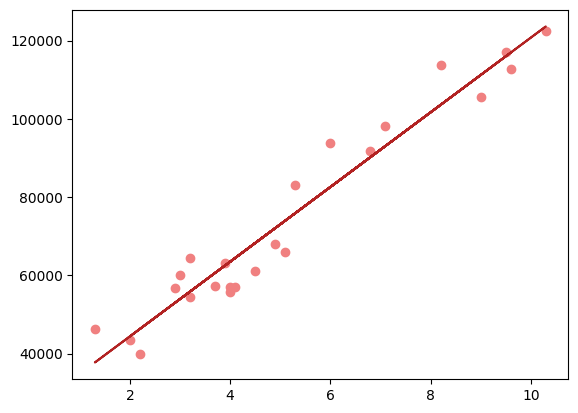

In [79]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color='firebrick')
plt.show()

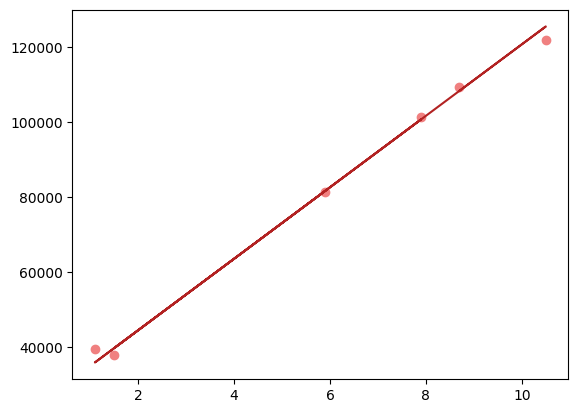

In [80]:
plt.scatter(X_val, y_val, color = 'lightcoral')
plt.plot(X_val, y_pred_val, color='firebrick')
plt.show()

In [81]:
reg.coef_

array([[9541.24142669]])

In [82]:
reg.intercept_

array([25326.76297401])

https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=The%20coefficient%20of%20determination%2C%20or,line%20approximates%20the%20actual%20data.

In [83]:
from sklearn.metrics import r2_score
r2_score(y_pred_train, y_train)

0.9356816776530104

In [84]:
r2_score(y_pred_val, y_val)

0.995498689794974